In [6]:
import sys
sys.path.append('..')

from utils import get_task_dataset
from tqdm import tqdm
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import json

In [7]:
def print_colored_string(chars, bools):
    # Define ANSI color codes for red and green
    RED = '\033[91m'
    GREEN = '\033[92m'
    RESET = '\033[0m'
    
    # Loop through characters and booleans to print each character in the appropriate color
    for char, boolean in zip(chars, bools):
        if char == ' ':
            char = '_'
        if boolean:
            # Print in red if True
            print(f"{RED}{char}{RESET}", end="")
        else:
            # Print in green if False
            print(f"{GREEN}{char}{RESET}", end="")

def print_deletion_patterns(model_name, task, language="en", seed=28, ckpt=3000):
    eval_dataset = get_task_dataset(task, "test", iterable_dataset=True)
    json_file = f"deletion_patterns/{task}_{language}/{model_name}_seed{seed}_ckpt{ckpt}.json"
    with open(json_file, 'r') as f:
        deletion_patterns = json.load(f)

    for i, _ in tqdm(enumerate(eval_dataset), total=len(deletion_patterns)):   
        # Get decoded tokens and deleted spans
        decoded_tokens = deletion_patterns[i]["decoded_input_ids"]
        is_deleted = deletion_patterns[i]["deletion_mask"]

        if i < 50:
            print_colored_string(decoded_tokens, is_deleted)
            print()

        if i+1 >= len(deletion_patterns):
            break

def plot_deleted_tokens(deleted_counter, kept_counter):
    # Combine the counters and calculate percentages
    tokens = sorted(set(deleted_counter.keys()).union(set(kept_counter.keys())))
    deleted_counts = np.array([deleted_counter[token] for token in tokens])
    kept_counts = np.array([kept_counter[token] for token in tokens])
    total_counts = deleted_counts + kept_counts
    deleted_percentages = deleted_counts / total_counts * 100
    kept_percentages = kept_counts / total_counts * 100

    # Plotting
    plt.figure(figsize=(14, 7))  # Adjust the width and height as needed
    bar_width = 0.5
    r = np.arange(len(tokens))

    plt.bar(r, kept_percentages, color='green', edgecolor='grey', width=bar_width, label='Not Deleted')
    plt.bar(r, deleted_percentages, bottom=kept_percentages, color='red', edgecolor='grey', width=bar_width, label='Deleted')

    plt.xticks(r, tokens, rotation=45)
    plt.ylabel('Percentage')
    plt.title('Percentage of Tokens Deleted/Not Deleted')
    plt.legend()

    plt.show()

def display_deleted_tokens_plot(model_name, task, language="en", seed=28, ckpt=3000):
    eval_dataset = get_task_dataset(task, "test", iterable_dataset=True)
    json_file = f"deletion_patterns/{task}_{language}/{model_name}_seed{seed}_ckpt{ckpt}.json"
    with open(json_file, 'r') as f:
        deletion_patterns = json.load(f)

    deleted_counter = Counter()
    kept_counter = Counter()

    for i, _ in tqdm(enumerate(eval_dataset), total=len(deletion_patterns)):   
        # Get decoded tokens and deleted spans
        decoded_tokens = deletion_patterns[i]["decoded_input_ids"]
        is_deleted = deletion_patterns[i]["deletion_mask"]

        deleted_counter.update([token for token, delete in zip(decoded_tokens, is_deleted) if delete])
        kept_counter.update([token for token, delete in zip(decoded_tokens, is_deleted) if not delete])

        if i+1 >= len(deletion_patterns):
            break
        
    plot_deleted_tokens(deleted_counter, kept_counter)

## Simple Vowel Removal Task

100%|█████████▉| 1000/1001 [00:00<00:00, 26300.37it/s]


#VYaCUXxCBVefwUOJivMagsgwfnLfdiZjkfmGKwxdqYFCVJrimDZwyNpIEkYofP</s>
#dSXBliKVhZudXfmjdaQmRuDqFoCSuwbiaRqzfbTOlwOjxqyEXNEMnhZUvUnECf</s>
#HsWgSLTMgQGulMDMZXQcjWvsVeFRrhRkxhlFdXhGZRbWEHsFiPzxsgNVQyxmUh</s>
#SAEfziwVSQmYNSqdgRosZCpWIFHtOBFOQOObEjxYcECLxDUMQcAduxlfmCUBVh</s>
#NYJrpFfMUPoqebdKoePqcrennCBXUTMbymaSOiqkeXVAiJJjKORrvstzjzDDOK</s>
#BoXfHUtwVZNJqvboqgLUeOPRdatqoTejJgCjabyxgnOkVqLkPuBJwQXWoeOqUW</s>
#CpCPfqlwRkjQXwMDjddqOCnzOtHjFhmjyEKsUsnPmZnnXjYiEKtVTjzGoNcNMj</s>
#jYtojeIDYLjDscMtBLJagDZHOGNEQisYSOpvDTVICSljKcebozWcCEueNutxBB</s>
#OlwqzYJXhTcvJGjhxQtaqEkvXenxctLLYxMDCZyeqSsuXhaDQQtYPkamTIoxAg</s>
#bpwRMCgPNPNxqmoaPYclZbTzlYdngKwVAhFPpmoJELnkLnlCEJPoorUQZLvQWx</s>
#xaRNOOHyAJJfGDDNYCLasTEtqvbigbaTPZShYJIjRAQxzKlqqlzDBOKEOgQTqD</s>
#BXtHmXexJpozyUxaOaMhTJtPAGMjShFSYDvPgHQfUSYDsoYvWmkvnlFhaIqdSj</s>
#pQPesylWmoTpMqvmsIAWVQGEWUxASgsCxjnJHwCNoCcLOEsdeZrIHlWHcvXSbM</s>
#cbZCPfUswYbTboFzyQdAfgjGPzzmbelxlypSVUWwYxNOKiielglyZWKzZTwLrw</s>
#dWUtbPGMPGoyqjNlcWnUnKgDxpRMQhFGYJIuDtoxhQGRPxc

100%|█████████▉| 1000/1001 [00:00<00:00, 41674.66it/s]


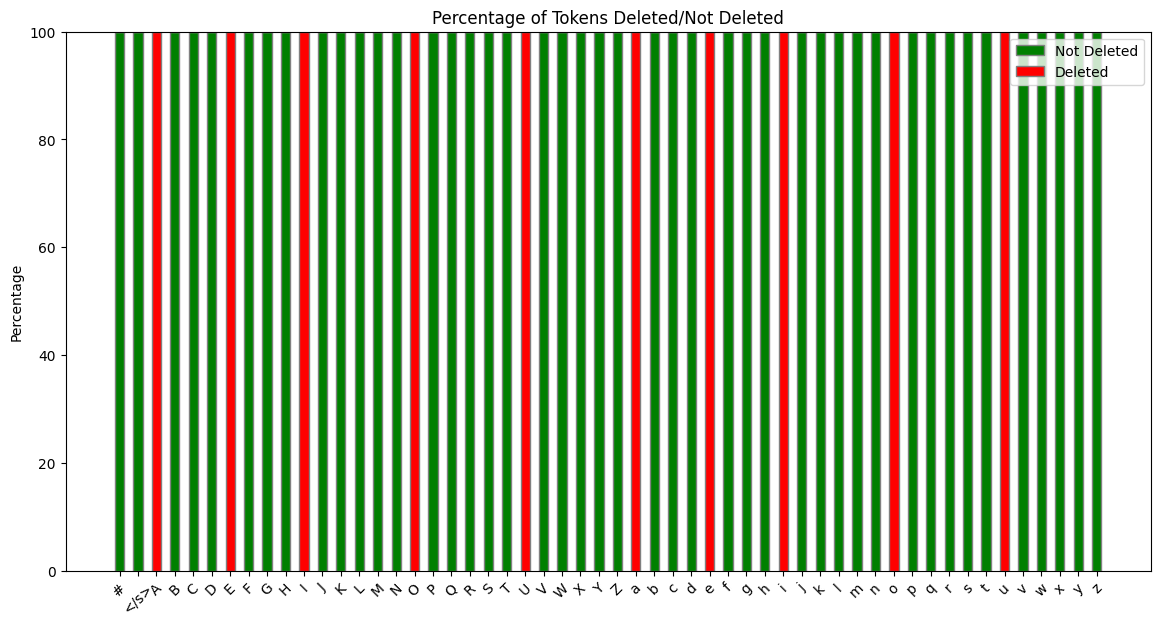

100%|█████████▉| 1000/1001 [00:00<00:00, 41252.47it/s]


#HmOygnpEWRfcIYVADTqiRmhUYzNUwPoRJAwIPEikYwlixrDxLcUnKunSYgDbDk</s>
#OYEIcRpHqiAMkiPkLXkuVTVIbVyFMTcBFQkOAJyYOZpYsCymteZJNxacWohQYn</s>
#rLcRAqRrEZtTJjkHSaPWmOZYGSPhVgxloXpBCSOdUieBMGBrOnOOxJEuHUCTRz</s>
#JttrQfZtJVmuPijLfIpDmYsvtlXqtfSepSaEomRoYWrlAJDwdGLoojsUDZeJfG</s>
#YvyEQiWGatnmrNNqdedDTvufDytvzjcRphamdBdpgVGCgnLCMRDWnPXgdpGcwz</s>
#BITmDWMHtFIUqeRPRMfMpaYQJqgoRvnyJODJeMXQNhJaVIzlIrbgefufhKnGga</s>
#SrhJJpPxJmeZLxXiFBAhGuCjTEJeJVpMIRbTjchmZzHojABqmiBXKZaXaYMXit</s>
#viXmYQWiIYZmtdssjSdrEaCnvHuJIPscLRwKtwocanWQQzUdwOcBucDPYFCOaS</s>
#QgmxPoeOGpGdIacimgeFvBqbcmRlpkowKueuKFjSihzLTWkkhmQbJFsUwWQIis</s>
#KhTHZhUEOUlMzGnjoHqpNgZXMpcgFfCmGBVCYsdLlNOoJrkKVIIMNBUjMzYUHY</s>
#eECJlIwnrlvUsbwwohjcLftnIhVXqxvgcBSJDwqWqRYDTZrRIuzaHFcbOFiZyr</s>
#IfpUOWeegyDZfnpTPtGcbLasRZlpDCxHlNezAhQfBPaIIGmvzMQbYWkyQVidSt</s>
#LsaYdayggFnAWfSNKYbTQYuCKPBDHpmTLVbKSPnitKpVOvuGqPwhXULgkFLGLc</s>
#IbLKAlZtBMuvvzLiZlBHehCgdSuECxUoCJNWknRlFdKZlCkBFkzlMlKiXuwkzc</s>
#optrdElxTdBQvYKzByxCoaxhJDYnZEyDsaVtVYEzFUQrmoD

100%|█████████▉| 1000/1001 [00:00<00:00, 36594.08it/s]


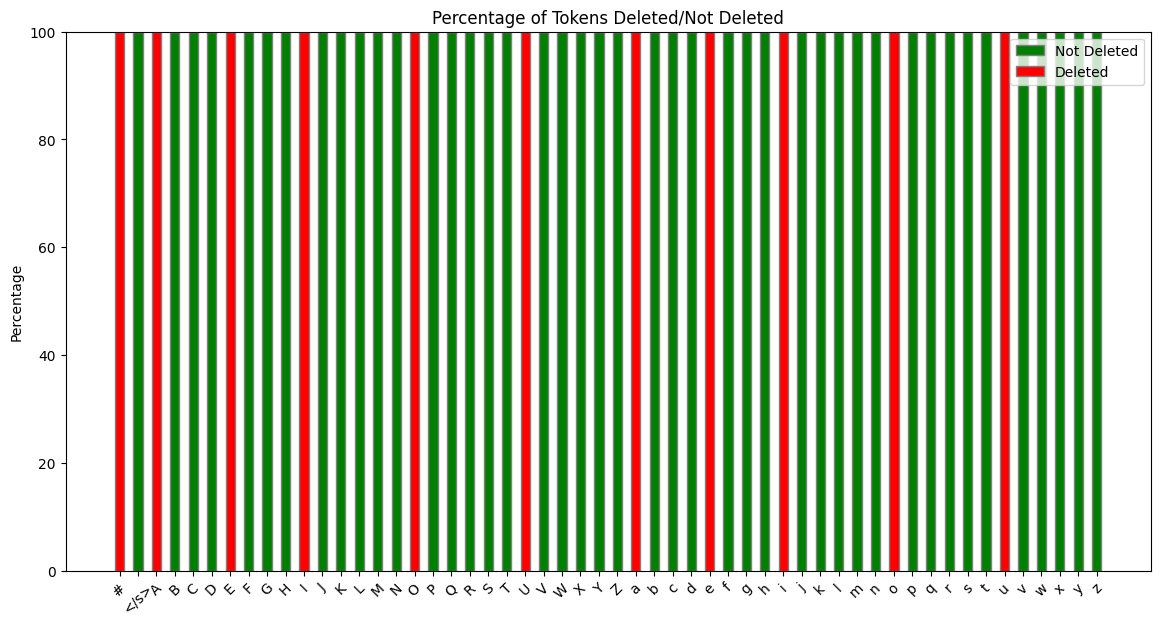

In [8]:
alpha_and_seeds = [("1e-4", 429), ("1e-3", 93)]
for alpha, seed in alpha_and_seeds:
  model = f"mrt5_simple_vowel_removal_{alpha}"
  print_deletion_patterns(model, task="vowel_removal", seed=seed, ckpt=30000)
  display_deleted_tokens_plot(model, task="vowel_removal", seed=seed, ckpt=30000)

## Contextual Vowel Removal Task

100%|█████████▉| 1000/1001 [00:00<00:00, 26042.03it/s]


#LoQdUmEDomezIuBILOlIEmEHgoYunocQiuFAWoGebFIXXidqUrboloYoDTeJeR</s>
#punJUlOrorEBcAManpITOTexIJydoginIdeqPJuHpUXNUmelxewaorEfEjxaNf</s>
#xUKDAZOlFAsuvevuLUZUpOCtoUlIRiheQMAFuTEciviPUohIurevUCaZJEcZIQ</s>
#lASECOdohopUSoWEyRAHfoSURCiziMokeiYEdICOfeFaUtAsETuUGipUXAkUEy</s>
#QUnjuWpaLoByAGuPOLoYOHozawimElsuDQeCLoJiwXIGOtbOINorERIuHOmoUT</s>
#nvigrUruoYBrNxcElqhWzPmGqOILFQRbhzpimvrOLqxoQDiDqFzUOKlaExANFK</s>
#hFHYLCnqVXofEEEtDEDarXLUorPpIjxfgeprgUoqFeCowOmIXRNMeDZIHeFKVv</s>
#heNyAFAJalvFeSJalErTMaBlxoAWGROgdTpbhdOjeZpIzSdnAWIhlAuYgyoTZK</s>
#vYWdrIaNPTUECiCYRoTIBiubItxSuhNAAcUYkNXEdoZuAdXJERjerilfzAbMfA</s>
#GewOmezipaPEZsAseWaseEmIYIxzonJoboVWoSUwxuGUWogurnIsinUjzIbOsr</s>
#jvuPHIZaAhEPCeKiHELAGUBAuGIigOQEdpEkoDeREYkUQwUCEpiwIlOPolebIq</s>
#RABUtPufPiKINkiopAvdeVXAbKuriqecUPIwAhhUZbEizogAHUpriXaDoUmADt</s>
#TkOSiWIgodyukaLitULehOFADoAvoraBVIzOuqUmuJawwuKeAWaxGUFAYULuXA</s>
#bilUmuJiLaNExAqSvuSeXqiqEjAeTuxaTNoGxUdlCeZEUKeRrhIPOyELoHxIcU</s>
#QAzipAKIPyENOXivEyoBugAGnaSAvAFjorhUVokciLludoK

  0%|          | 0/1001 [00:00<?, ?it/s]

100%|█████████▉| 1000/1001 [00:00<00:00, 39372.05it/s]


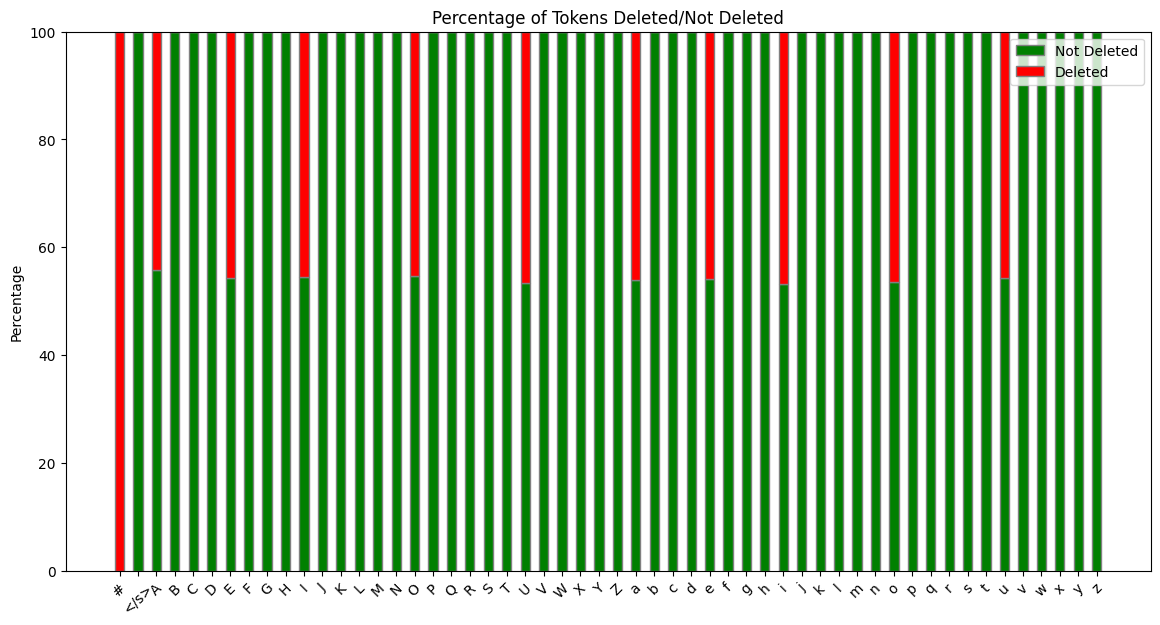

100%|█████████▉| 1000/1001 [00:00<00:00, 40696.11it/s]


#rEBIJnojotUiITUNetawzeTeyOcZuijbevAQoWuBerauyxEHZFFEnOVaJIqJIg</s>
#hAzaMopAmuPNUYVAFlesefinuJUKEftOxuRVoViEHIsxUPHAztAifEnAFYunaK</s>
#PukfHmBuJbuzPBObeZjeSfbMexpvwzoFUTiWEJVpbOQYInlDvSkqiCIVyoGGfl</s>
#psOgFpIqXUQZJimIcZMEgotNvuwehANUkrjoLOQieAvIVYzoQbhTFNerpkeCnn</s>
#HUWIWidOFEMOKmIPIciHIvVAbalilEczUraIJugkUsokEzAvUBuWrItEBkaRow</s>
#crawuXEhBiqaXiLeKBOqIhulzeKaguqEYWArAdaNIpIKETeKOquYeQApIutaye</s>
#viNsokujesJESiwaVeTuFeDaLdUpofUJaDZoyUDOQIzVEOSolkoUnAXiGiyIPR</s>
#NijPQSLEEPGejeLDxmiyeJdIggIHANwReFiBoCuoZskiDAFEdrLayZIGuxXgOi</s>
#VuBzeJAdOHubUSISiLalluLUyIwhOGEwUQFIfOVipUjaWamihIHoWalMAgiBaK</s>
#VqEQQACANagPOwxOvulUqiwElNetgIZmotUpVaSULAzULPUZOhOgOkQIqOsOtZ</s>
#AwiekALnurEyAqaKVIhxImoJadIFAkIgLOfeVaUgeQoXazacJoFNeJumHuZpAx</s>
#UTUsaMBqhXOeGSiDkzzazopTIFJiQVAvoyZeBQFHOvIWoLvUyliEzLRHdZafKn</s>
#neyYuqkOSujAGuwTOsAsUXECXiCepYamZAnepqaxoHuqiSmiPiIqeRitUlixoD</s>
#dowvihuuLOboycUfBUbaRUbAVinObyipoVQOzeYnekCIlRAVkeGIyujenjEjot</s>
#UcATusxUcqeviluVnaBIlmavUTIHIOQiCiKHoFOdUWUQraM

100%|█████████▉| 1000/1001 [00:00<00:00, 40605.10it/s]


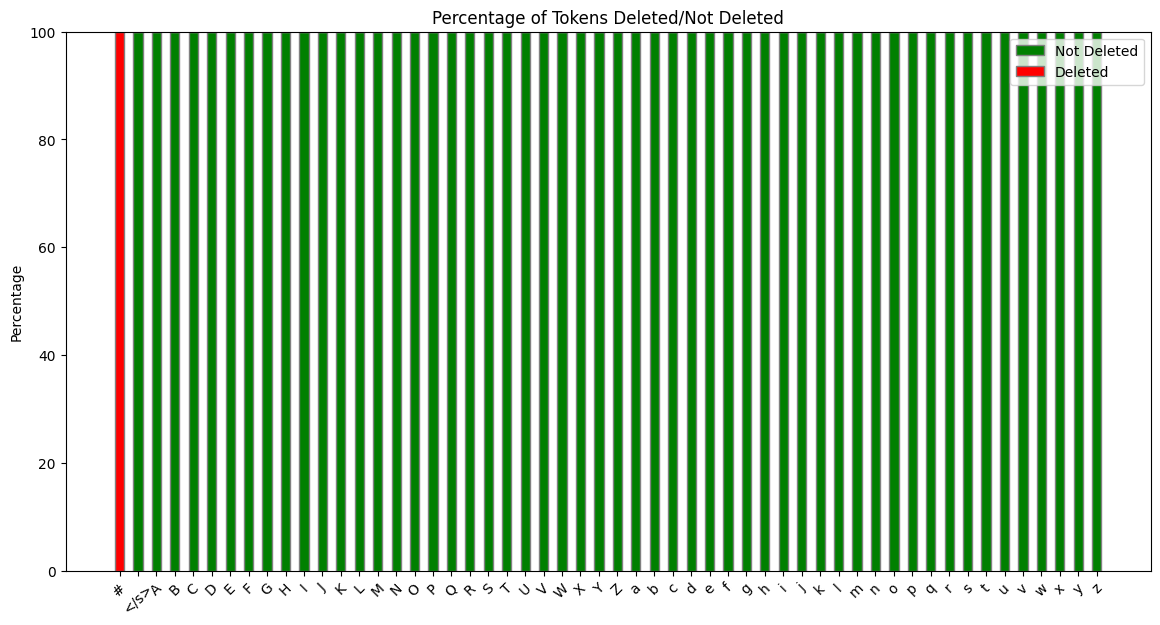

In [9]:
alpha_and_seeds = [("1e-2", 934), ("1e-3", 510)]
for alpha, seed in alpha_and_seeds:
  model = f"mrt5_contextual_vowel_removal_{alpha}"
  print_deletion_patterns(model, task="contextual_vowel_removal", seed=seed, ckpt=30000)
  display_deleted_tokens_plot(model, task="contextual_vowel_removal", seed=seed, ckpt=30000)

## Merge Task

100%|█████████▉| 1000/1001 [00:00<00:00, 20325.47it/s]


#ECHawMrVUsABCABCmNABCBQRABCABCAiDABCnLABCXEABCBABCQtVMSKABCdaC</s>
#lJitdTFVMSSyPvrCUxESjJkNmblARABCwdABCiaFABCRABCHjkxhtQBqpNCEDX</s>
#MepnBXABClDxpztmurjUZiHVEUjjprABCABCzBVozTJpsoJvsqLkavLrSwFkWp</s>
#DKABCMhBidmixSrEUvJqIABCBOxABCEQwDCHJCHrABCFSxNzwZvbRIyYOQSgUC</s>
#duQABCcgmABCpavnJHABCmfABChwIkdlrwqYABCSEnEABCOLnABCwtmTnbwsZE</s>
#cIABCxQnABCnhOuSjAQPYQABCABCRmqABCzrHSABCqDskfSrNjaEAFPKuDamxl</s>
#ISwDOazABCOlABCNiABCABCnqgjWfiABCDgbkbABCKABCdABCPFcpcUaOwvORn</s>
#XnkMTXgABCQvABCsABCABCyKUhljdzMmvPABCAABChOkWAABCUABCYeABCDkXO</s>
#oJbynABCjFuWCIhgfsEoOIzyPABCaEclIWVDLrusNXJzDGWABCRygwzhJABCZP</s>
#DyjcABCfgciRABCXwSZABCMrABCIHtVyyZbABCABCDQJTdCABCABCvqABCABCY</s>
#nPDlxABCPdcABCSzyxVNMnAABCpwJABCmsoADOUjroSsOhMHAuEWlTmNnnejKh</s>
#oVsABCpOYtznABCABCTABCjjrWABCHwApGxbyhHEoItplItKTbABCyqABCSzmP</s>
#NABCyvZZvAlMTnwQCubBvsVABCSABCiOiwvABCOshtZeJFyIHqRHrzTqyniAXt</s>
#ONIEkPucTQRSzMFZpNmPxFVSBdaeABCPUngxNjFenViziChiCjyFmzABCkRecl</s>
#VTzFjjgRkNjaOMJeKjsRgveABCdzzXMVIzIABCozpzZzHSn

100%|█████████▉| 1000/1001 [00:00<00:00, 45292.90it/s]


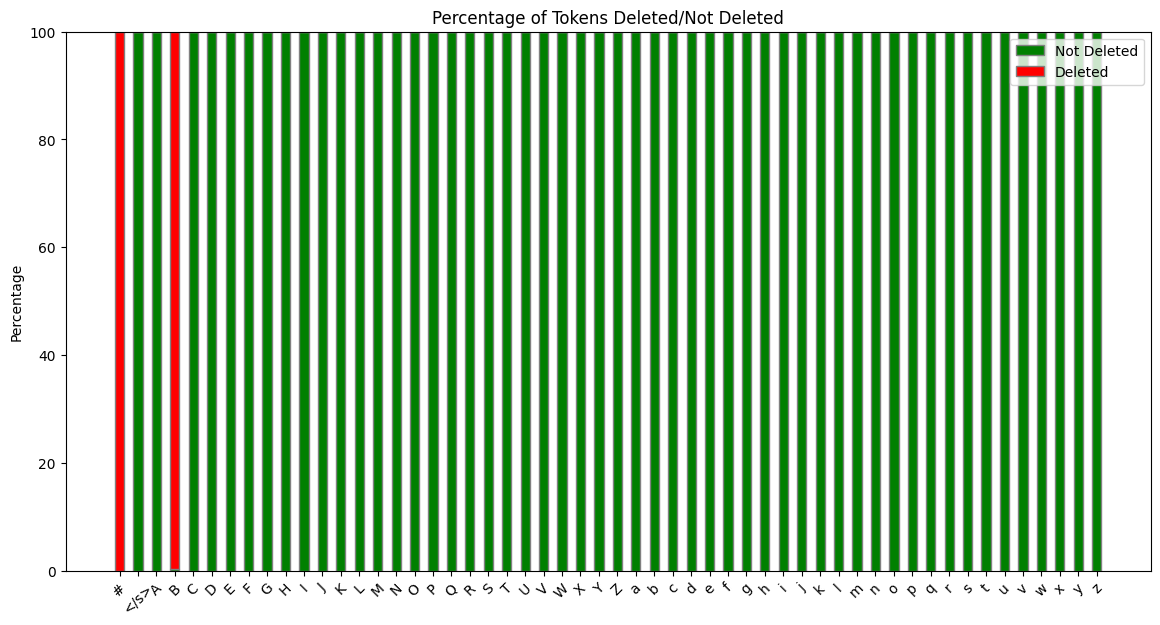

100%|█████████▉| 1000/1001 [00:00<00:00, 35738.18it/s]


#ABCuXUtSqtHiABCABCLoABCbABCFABCzoxVSABCPYkEtFvVePsaBNlYlJABCwY</s>
#FymeIOeeyTsQGTeQkUmyQqPTaFuTGlqEBsayXKPBeABCxMFNnymzQNvNaOtNkU</s>
#mYNCIjhQTgrcxKMUliiABCABCDWHlABCxrsoiamKjvoABCmABCWkRhRKoHyXsY</s>
#QrytmnFJuSrhzVyrjLLjyUhABCjuHMHHpdGVUNABCftEqJwQaXfxhkABCQkrXr</s>
#sgABCeCtSJLexAMegABClwABClnKrjuApUmgqMwYaPhNuottQtoIlIYgdNHtoD</s>
#rLABCghlABCJXvsvQWcaPABCRUvpABCumWnlABCWaElHABChABCmlgrcrVPWIz</s>
#QWSoaUlJBWWdDABCdcjEpctwgHGTtXoCvTBflyDvuGDbvVYGAyRmOTIOUPoiyS</s>
#HaABCABCHXmwuABCKVTNzMHEPiGfIoqIkCkqKyUStjenABCeHVXOABCziBVrUF</s>
#QNRLABCCABCovlZvyoPwBABCFOtbfYXibABCowGABCQhXGeABCBDbDtgpFABCT</s>
#OABCWDABCoCABCInshtzABCBBNRtujjdtbccoljaQABCFABClABCeZpZYvhxzS</s>
#oyRDfJREmGnDVwwDQoxNOZKEGYhFDAfLtGZYuYDqXgedbFTABCjDLiDKPHQmrV</s>
#ABCOTExGUHABCABCoMEzkTABCsXGZZtJABCsQIjSxABCmOpCABCioMhHSvbEjV</s>
#bRABCABCppmThEPHrABCBCPKABCtavlABCGWABCDuvHABCxSMVMTABCABCABCr</s>
#jFSxKZzGJnfEaUOxWlJgLUVHIDMmhpGTRkUqasKYrHEcBkBOfUyCakuQABCehF</s>
#IBcLjqWQmveYluotKAbjhjnTUjGWBlsMRZQQotLcwngllXJ

100%|█████████▉| 1000/1001 [00:00<00:00, 48167.76it/s]


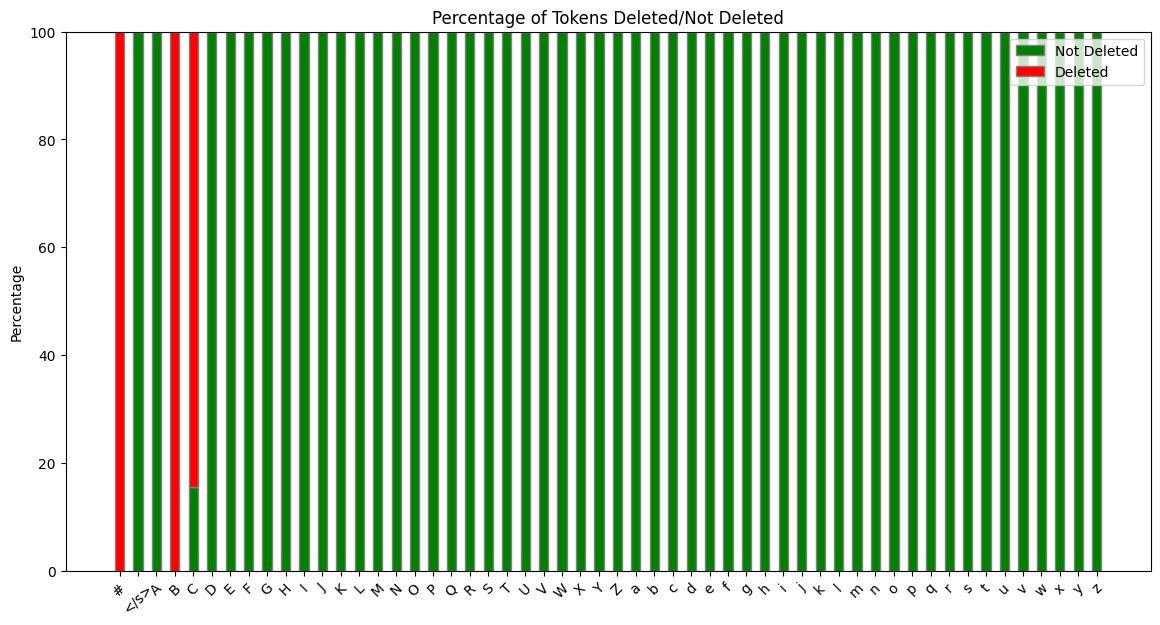

In [11]:
alpha_and_seeds = [("1e-2", 14), ("1.5e-2", 123)]
for alpha, seed in alpha_and_seeds:
  model = f"mrt5_merge_ABC_{alpha}"
  print_deletion_patterns(model, task="merge_ABC", seed=seed, ckpt=30000)
  display_deleted_tokens_plot(model, task="merge_ABC", seed=seed, ckpt=30000)